# Pré-processamento --= Handpass =--

## Algoritmos para correlação de atributos

### Importando bibliotecas e módulos para o pré-processamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Importando arquivo como variável array

In [ ]:
df_handpass = pd.read_csv("datasets/DB_Infocom_4k_handpass.csv")
np_handpass = df_handpass.to_numpy()

### Análise Exploratória de Dados (EDA)

In [3]:
#Observando os dados
print(df_handpass.shape, "\n")
print(df_handpass.head(1), "\n")
#print(df_handpass.columns, "\n")
print(df_handpass.describe(), "\n")

(4000, 471) 

   rpi1_amplitude_sc-122  rpi1_amplitude_sc-121  rpi1_amplitude_sc-120  \
0               0.339854               0.396486               0.474028   

   rpi1_amplitude_sc-119  rpi1_amplitude_sc-118  rpi1_amplitude_sc-117  \
0               0.499215               0.497602               0.500288   

   rpi1_amplitude_sc-116  rpi1_amplitude_sc-115  rpi1_amplitude_sc-114  \
0               0.510201               0.497692               0.450023   

   rpi1_amplitude_sc-113  ...  rpi1_phase_sc117  rpi1_phase_sc118  \
0               0.292311  ...          0.586619          0.486821   

   rpi1_phase_sc119  rpi1_phase_sc120  rpi1_phase_sc121  rpi1_phase_sc122  \
0          0.367623          0.246327          0.109322          0.991821   

   capture  movement  gender    user  
0        1      mov1       m  User01  

[1 rows x 471 columns] 

       rpi1_amplitude_sc-122  rpi1_amplitude_sc-121  rpi1_amplitude_sc-120  \
count            4000.000000            4000.000000            

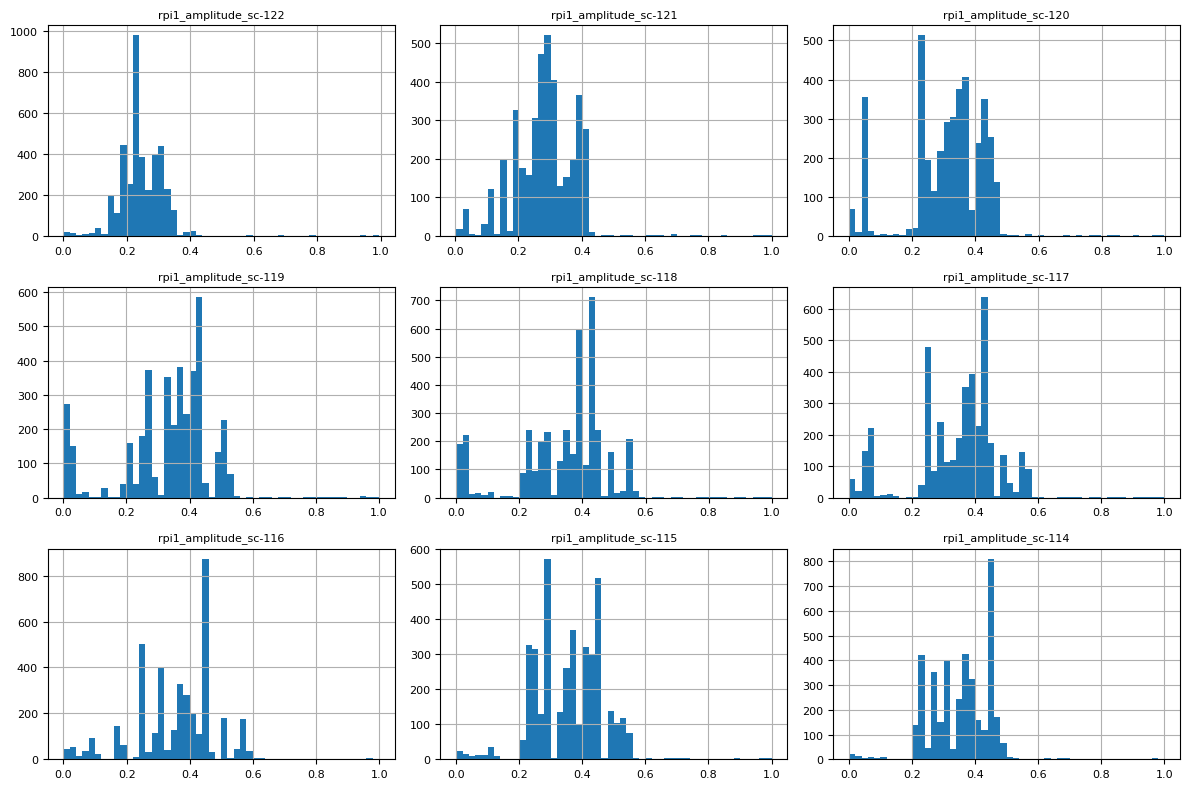

In [4]:
#Plotando graficamente os dados
df_handpass.iloc[:, 0:9].hist(bins=50, figsize=(12,8))
#Para ajustar os títulos e rótulos de cada eixo (se houver)
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.title.set_fontsize(8)

plt.tight_layout()
plt.show()

#### Algoritmos de correlação de atributos

- Pearson Correlation (atributos numéricos):  

    Encontra o relacionamento linear dos atributos ideal para classificação binária (0_1, A_B).

In [5]:
#Selecionando as colunas de atributos (amplitudes)
atributos = df_handpass.iloc[:, 0:234]

print(atributos.shape, "\n")

(4000, 234) 



In [26]:
#Selecionando as colunas de atributos (amplitudes)
atributos = df_handpass.iloc[:, 0:233]

#Convertendo a coluna 'user' para números
rotulo_numerico = pd.factorize(df_handpass['user'])[0]  # retorna array 0,1,...,19

#Concatenando atributos + alvo numérico
df_corr = pd.concat([atributos, pd.Series(rotulo_numerico, name='user')], axis=1)

#Calculando correlação de Pearson entre cada atributo e a classe alvo ('user')
correlations = df_corr.corr(method='pearson')['user'].drop('user')

#Top 50 maiores correlações positivas e negativas
top50_pos = correlations.sort_values(key=abs, ascending=False).head(50)
#top50_neg = correlations.sort_values(key=abs, ascending=True).head(50)
'''
print("Correlação de Pearson entre atributos e classe alvo:")
print("Top 50 atributos mais positivamente correlacionados com 'user':", '\n', top50_pos, '\n',)
#print("Top 50 atributos mais negativamente correlacionados com 'user':", '\n', top50_neg)
'''
#Selecionando os atributos mais correlacionados com classe alvo ('user')
att_pearson_corr = top50_pos.index.tolist() #+ top50_neg.index.tolist()
print(att_pearson_corr)
'''
#===============================================
#Plotando as 50 maiores correlações positivas
plt.figure(figsize=(6,3))
top9_pos.plot(kind='barh', color='green', alpha=0.7, label="Positiva")

#Plotando as 50 maiores correlações negativas
#top9_neg.plot(kind='barh', color='red', alpha=0.7, label="Negativa")

plt.title("Top atributos correlacionados", fontsize=14)
plt.ylabel("Coeficiente de Correlação (Pearson)")
plt.tight_layout()
plt.show()'''

print('')

['rpi1_amplitude_sc-105', 'rpi1_amplitude_sc-92', 'rpi1_amplitude_sc-3', 'rpi1_amplitude_sc71', 'rpi1_amplitude_sc88', 'rpi1_amplitude_sc72', 'rpi1_amplitude_sc-93', 'rpi1_amplitude_sc120', 'rpi1_amplitude_sc-49', 'rpi1_amplitude_sc-104', 'rpi1_amplitude_sc7', 'rpi1_amplitude_sc87', 'rpi1_amplitude_sc-109', 'rpi1_amplitude_sc62', 'rpi1_amplitude_sc-57', 'rpi1_amplitude_sc13', 'rpi1_amplitude_sc-2', 'rpi1_amplitude_sc14', 'rpi1_amplitude_sc55', 'rpi1_amplitude_sc61', 'rpi1_amplitude_sc-9', 'rpi1_amplitude_sc119', 'rpi1_amplitude_sc-41', 'rpi1_amplitude_sc-77', 'rpi1_amplitude_sc-60', 'rpi1_amplitude_sc118', 'rpi1_amplitude_sc-64', 'rpi1_amplitude_sc56', 'rpi1_amplitude_sc-107', 'rpi1_amplitude_sc-66', 'rpi1_amplitude_sc-106', 'rpi1_amplitude_sc-119', 'rpi1_amplitude_sc96', 'rpi1_amplitude_sc57', 'rpi1_amplitude_sc32', 'rpi1_amplitude_sc-67', 'rpi1_amplitude_sc12', 'rpi1_amplitude_sc-48', 'rpi1_amplitude_sc3', 'rpi1_amplitude_sc-76', 'rpi1_amplitude_sc-58', 'rpi1_amplitude_sc54', 'rpi1_a

- Random Forest (atributos numéricos):  

    Encontra relações complexas e não-lineares entre o astributos

In [27]:
#Preparação dos dados (é necessário para o algoritmo Random Forest)
X = df_corr.drop(columns=['user'])      #Apenas atributos sem classe alvo
y = df_corr['user']                     #Classe alvo

#Divisão dos dados em conjuntos de treinamento e teste (mantendo proporção das classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#======================
#Modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=235,        #número de árvores
    max_depth=20,            #profundidade ilimitada
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

#Ordenação dos atributos pela importância
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
'''
print("\nImportância dos atributos segundo o Random Forest:")
print(importances_sorted.head(50))  #mostra os 50 mais importantes
'''
att_RF_corr = importances_sorted.head(50).index.tolist()
print(att_RF_corr)
'''
plt.figure(figsize=(6,3))
importances_sorted.head(50).plot(kind='barh')
plt.title("Top 50 atributos mais importantes (Random Forest)", fontsize=14)
plt.ylabel("Importância (Gini Importance)")
plt.tight_layout()
plt.show()'''

print('')

['rpi1_amplitude_sc-15', 'rpi1_amplitude_sc22', 'rpi1_amplitude_sc-13', 'rpi1_amplitude_sc-108', 'rpi1_amplitude_sc-112', 'rpi1_amplitude_sc17', 'rpi1_amplitude_sc54', 'rpi1_amplitude_sc94', 'rpi1_amplitude_sc21', 'rpi1_amplitude_sc36', 'rpi1_amplitude_sc-77', 'rpi1_amplitude_sc-117', 'rpi1_amplitude_sc118', 'rpi1_amplitude_sc-80', 'rpi1_amplitude_sc47', 'rpi1_amplitude_sc-82', 'rpi1_amplitude_sc15', 'rpi1_amplitude_sc-93', 'rpi1_amplitude_sc-81', 'rpi1_amplitude_sc-31', 'rpi1_amplitude_sc-2', 'rpi1_amplitude_sc-47', 'rpi1_amplitude_sc-97', 'rpi1_amplitude_sc19', 'rpi1_amplitude_sc77', 'rpi1_amplitude_sc-12', 'rpi1_amplitude_sc-10', 'rpi1_amplitude_sc23', 'rpi1_amplitude_sc-48', 'rpi1_amplitude_sc42', 'rpi1_amplitude_sc14', 'rpi1_amplitude_sc-28', 'rpi1_amplitude_sc62', 'rpi1_amplitude_sc-79', 'rpi1_amplitude_sc-107', 'rpi1_amplitude_sc78', 'rpi1_amplitude_sc45', 'rpi1_amplitude_sc48', 'rpi1_amplitude_sc120', 'rpi1_amplitude_sc50', 'rpi1_amplitude_sc80', 'rpi1_amplitude_sc-76', 'rpi1_a

#### Atributos com grande correlação com a classe alvo

In [28]:
best_att = []
for i in range(50):
    for j in range(50):
        if att_pearson_corr[i] == att_RF_corr[j]:
            best_att.append(att_pearson_corr[i])
            

print(best_att)



['rpi1_amplitude_sc-93', 'rpi1_amplitude_sc120', 'rpi1_amplitude_sc62', 'rpi1_amplitude_sc-2', 'rpi1_amplitude_sc14', 'rpi1_amplitude_sc-77', 'rpi1_amplitude_sc118', 'rpi1_amplitude_sc-107', 'rpi1_amplitude_sc-48', 'rpi1_amplitude_sc-76', 'rpi1_amplitude_sc54', 'rpi1_amplitude_sc-108', 'rpi1_amplitude_sc-42', 'rpi1_amplitude_sc-82']


#### PairPlot da distribuição dos melhores atributos

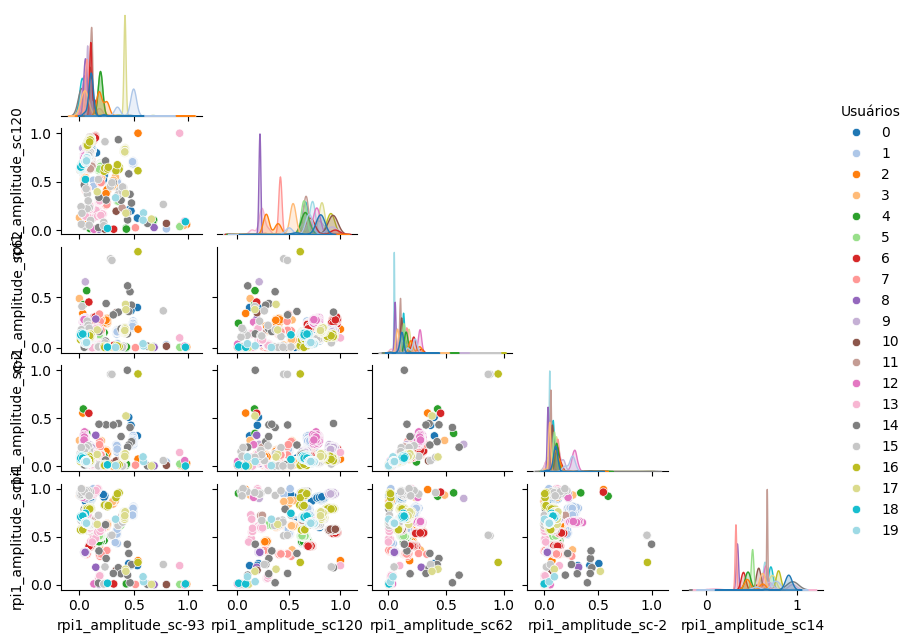

In [30]:
#Cria um novo DataFrame contendo os melhores atributos e a coluna de 'rotulo'
df_plot = df_corr[best_att[0:5]+ ['user']].copy()

#Renomear a coluna e mapear os valores para falha = 0, sucesso = 1
df_plot = df_plot.rename(columns={'user': 'Usuários'})
df_plot['Usuários'] = pd.factorize(df_handpass['user'])[0]

#Cria um gráfico de dispersão múltipla entre entre os atributos e a classe alvo
plot = sns.pairplot(df_plot, hue='Usuários', palette='tab20', corner=True, height=1.3, aspect=1.3)
plt.show()

## Importando bibliotecas e módulos para o treinamento de modelos

In [31]:
#Algoritmos de Machine Learning
from sklearn.tree import DecisionTreeClassifier                      #Árvores de decisão
from sklearn.neighbors import KNeighborsClassifier                   #kNN
from sklearn.naive_bayes import GaussianNB                           #Naive Bayes
from sklearn.svm import LinearSVC                                    #Máquinas de Vetores de Suporte
from sklearn.linear_model import SGDClassifier                       #Gradiente Estocástico
import joblib                                                        #Salvamento e carregamento de modelos

#Utilidades
from sklearn.preprocessing import StandardScaler                     #Normalização de atributos
import time                                                          #Tempo de execução
from pathlib import Path                                             #Caminhos de arquivos

#Avaliação e seleção de modelos
from sklearn.model_selection import (
    cross_val_score,                                                #Validação cruzada simples
    StratifiedKFold,                                                #Validação estratificada
    GridSearchCV,                                                   #Busca em grade de hiperparâmetros
)

#Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,        #Métricas principais
    confusion_matrix, classification_report, ConfusionMatrixDisplay #Relatórios e matrizes
)

### Preparado conjunto de dados CSI para treinamento dos algoritmos de *Machine Learning*

Total: 4000 amostras de 20 pessoas (200 amostras por pessoa)

In [32]:
#Selecionar apenas os atributos mais correlacionados com a classes alvo 
df_handpass_selected = df_handpass[best_att + ['user']]

print(df_handpass_selected.head(), '\n')

#Preparação dos dados
X = df_handpass_selected.drop(columns=['user'])     #Apenas atributos sem classe alvo
y = df_handpass_selected['user']                    #Classes alvo

   rpi1_amplitude_sc-93  rpi1_amplitude_sc120  rpi1_amplitude_sc62  \
0              0.102346              0.811359             0.120162   
1              0.100806              0.792076             0.115320   
2              0.109484              0.780361             0.115184   
3              0.105230              0.819472             0.107906   
4              0.115848              0.827736             0.111284   

   rpi1_amplitude_sc-2  rpi1_amplitude_sc14  rpi1_amplitude_sc-77  \
0             0.111810             0.898632              0.092685   
1             0.098135             0.887038              0.092280   
2             0.115296             0.912361              0.091808   
3             0.106443             0.888771              0.086993   
4             0.107296             0.902450              0.075953   

   rpi1_amplitude_sc118  rpi1_amplitude_sc-107  rpi1_amplitude_sc-48  \
0              0.723758               0.488198              0.318476   
1              0.708

#### Treinamento com validação cruzada

- Padronização dos dados usando Z-score (pelo StandardScaler)
- Seleção dos melhores hiperparâmetros para cada algoritmo (pelo GridSearchCV)
- Treinamento usando a validação cruzada e a seleção do melhor modelo para cada algoritmo (pelo StratifieldKFold)

In [33]:
#Padronização dos dados CSI com média=0 e desvio_padrão=1 (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Definindo os modelos e hiperparâmetros
modelos_com_grid = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [3, 5, 7, None],
        'criterion': ['gini', 'entropy']
    }),
    "kNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7]
    }),
    "Naive Bayes": (GaussianNB(), {}),
    "SVM Linear": (LinearSVC(random_state=42, dual=False, max_iter=10000), {
        'C': [0.1, 1, 10]
    })
}

#Definindo as validações (configuração nested CV)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#Avaliação de modelos
resultados_val = {}
melhor_modelo = None
melhor_nome = ""
melhor_acc = 0

output_dir = Path("results/cross-validation")
output_dir.mkdir(parents=True, exist_ok=True)

relatorio_path = output_dir / "relatorio.txt"

with open(relatorio_path, "w", encoding="utf-8") as f:
    f.write("Relatório da Validação Cruzada:\n\n")

    for nome, (modelo, grid) in modelos_com_grid.items():
        print(f"\nModel: {nome}")

        #Caso haja grid, usar GridSearchCV
        if grid:
            grid_search = GridSearchCV(modelo, grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
        else:
            grid_search = modelo

        #Validação cruzada
        scores = cross_val_score(grid_search, X=X_scaled, y=y, cv=outer_cv, n_jobs=-1)
        resultados_val[nome] = scores

        #Treino final (melhor modelo) e medição de tempo
        start = time.perf_counter()
        grid_search.fit(X_scaled, y)
        end = time.perf_counter()
        tempo_treino = end - start

        final_model = grid_search.best_estimator_ if hasattr(grid_search, 'best_estimator_') else grid_search

        #Predição e avaliação do melhor modelo
        y_pred = final_model.predict(X_scaled)
        acc = accuracy_score(y, y_pred)

        #Relatório
        relatorio = classification_report(y, y_pred, target_names=list(y.unique()), digits=4)
        f.write(f"Model: {nome}\n")
        f.write(f"Tempo de construção: {tempo_treino:.6f} segundos\n")
        f.write(relatorio)
        f.write("\n" + "-" * 60 + "\n")

        print(relatorio)
        print(f"Tempo de construção do modelo: {tempo_treino:.6f} segundos")

        #Atualização do melhor modelo
        if acc > melhor_acc:
            melhor_acc = acc
            melhor_modelo = final_model
            melhor_nome = nome


Model: Decision Tree


              precision    recall  f1-score   support

      User01     1.0000    1.0000    1.0000       200
      User02     1.0000    1.0000    1.0000       200
      User03     1.0000    1.0000    1.0000       200
      User04     1.0000    1.0000    1.0000       200
      User05     1.0000    1.0000    1.0000       200
      User06     1.0000    1.0000    1.0000       200
      User07     1.0000    1.0000    1.0000       200
      User08     1.0000    1.0000    1.0000       200
      User09     1.0000    1.0000    1.0000       200
      User10     1.0000    1.0000    1.0000       200
      User11     1.0000    1.0000    1.0000       200
      User12     1.0000    1.0000    1.0000       200
      User13     1.0000    1.0000    1.0000       200
      User14     1.0000    1.0000    1.0000       200
      User15     1.0000    1.0000    1.0000       200
      User16     1.0000    1.0000    1.0000       200
      User17     1.0000    1.0000    1.0000       200
      User18     1.0000    

#### Matriz de confusão do melhor classificador

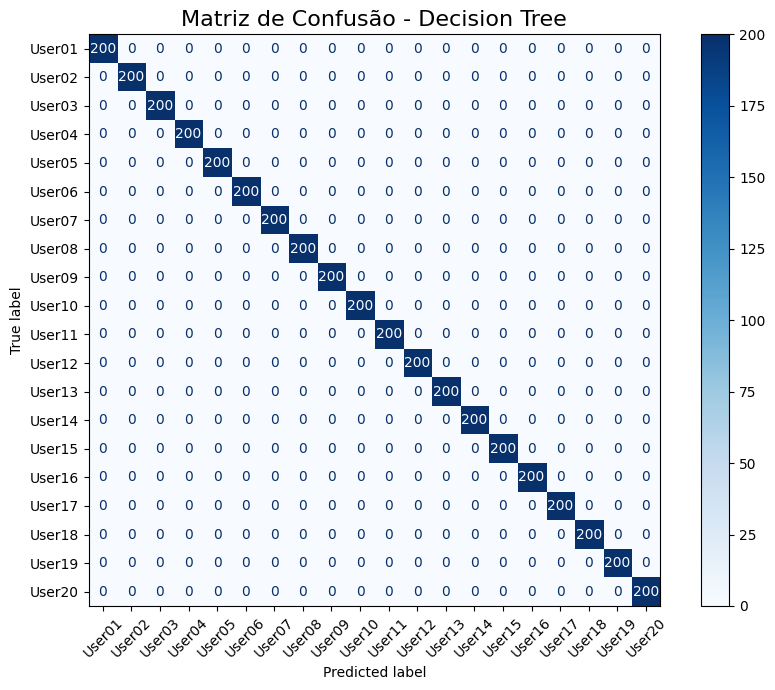

In [39]:
# Predição com o melhor modelo
y_pred_final = melhor_modelo.predict(X_scaled)

# Matriz de confusão
cm = confusion_matrix(y, y_pred_final, labels=melhor_modelo.classes_)
plt.figure(figsize=(9,7))  # ajuste largura x altura conforme necessário
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_modelo.classes_)
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())  # usa o mesmo eixo da figura

plt.title(f"Matriz de Confusão - {melhor_nome}", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()